# RYL 6

In [1]:
# dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import minimize

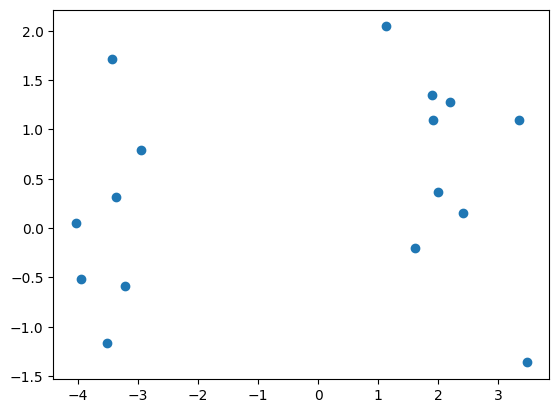

In [2]:
# look at our data
data = pd.read_csv("ryl6-points.txt", delimiter=r'\s+', header=None).values
u = data[:, 0]
y = data[:, 1]

plt.scatter(u, y)

In [3]:
# define the model
def f(theta, u):
    th1, th2, th3, th4 = theta
    numer = th1*u+th2
    denom = th3*u*(u+th4)
    return numer/denom

The best-fit parameters based on a starting point of 5, 5, 5, 5 are: [ 3.10967646 10.24952639  1.09197515  8.44448953]


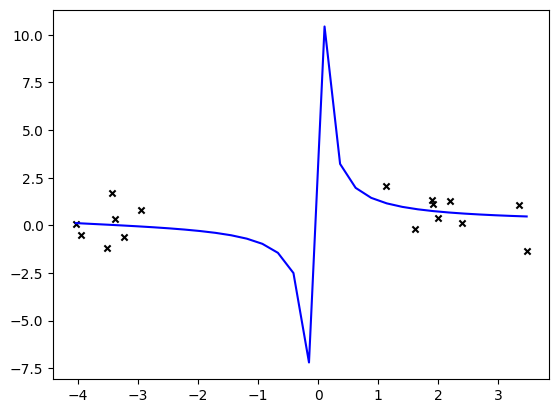

In [4]:
# (a) Fit this model to the data provided.

# cost
def c(theta, u, y):
    y_hat = f(theta, u)
    diff = y_hat-y
    return 0.5*np.linalg.norm(diff, ord=2)**2

# fit. NOTE: 5,5,5,5 was the best I found after trial-and-error with a few combinations
fit = minimize(c, np.array([5, 5, 5, 5]), (u, y))
print(f'The best-fit parameters based on a starting point of 5, 5, 5, 5 are: {fit.x}')

# visualize
plotting_u = np.linspace(min(u), max(u), 30)
plotting_y = f(fit.x, plotting_u)
plt.scatter(u, y, marker="x", color="black", s=20)
plt.plot(plotting_u, plotting_y, color="blue")

In [5]:
# (b) Identify the regimes in parameter space in which one parameter is practically unidentifiable.
# For each regime, find the effective model and fit it to the data. Qualitatively describe the
# feature in the data that the unidentifiable parameter controlled for.

# Let's discuss this by inspection first:
# We can see that th1*u+th2 / th3*u*(u+th4) expands to
# th1*u + th2 / th3*u**2 + th3*th4*u
# because of this, th3 will overwhelm all other parameters as it goes to infinity by
# effecting u**2--this makes the rest of the parameters practically unidentifiable.
# Oppositely, th2 is only a constant, so it is practically unidentifiable for large u.
# Setting these constant, th1*u/(th3*th4*u) evaluates to 1 when th1==th3*th4. th3/th4 is
# unidentifiable because in the model th4 is always multiplied by th3.
# setting th2 and th3 constant, th1 and th4 have an equal effect on the function.

In [6]:
# This is similar to a recent homework. We'll build the 4-d cost surface, then explore subspaces

# build the cost surface
theta_trials = 30
cost_shape = (theta_trials, theta_trials, theta_trials, theta_trials)
theta_range = np.linspace(1e-10, 1e10, theta_trials)
cost_surface = np.zeros(cost_shape)
my_meshgrid = np.meshgrid(theta_range, theta_range)

for i, th1 in enumerate(theta_range):
    for j, th2 in enumerate(theta_range):
        for k, th3 in enumerate(theta_range):
            for l, th4 in enumerate(theta_range):
                trial_theta = np.array([th1, th2, th3, th4])
                cost_surface[i, j, k, l] = c(trial_theta, u, y)

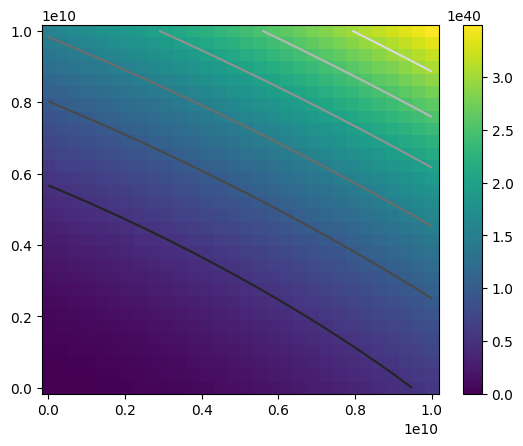

In [7]:
# th1 vs. th2
plt.contour(*my_meshgrid, cost_surface[:, :, 0, 0], cmap="grey")
p = plt.pcolormesh(*my_meshgrid, cost_surface[:, :, 0, 0])
plt.colorbar(p)

# Here we see a positive relationship between th1 and th2. For
# constant th3 & th4 the function effectively becomes th1*u + th2 / u**2.

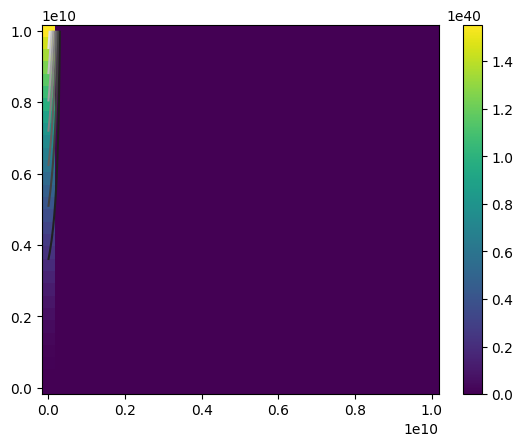

In [8]:
# th1 vs. th3
plt.contour(*my_meshgrid, cost_surface[:, 0, :, 0], cmap="grey")
p = plt.pcolormesh(*my_meshgrid, cost_surface[:, 0, :, 0])
plt.colorbar(p)

# Here we see th3 overwhelming th1, making th1 practically unidentifiable as
# previously discussed.

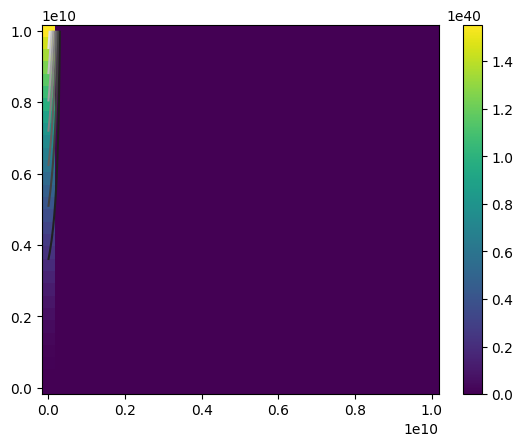

In [9]:
# th1 vs. th4
plt.contour(*my_meshgrid, cost_surface[:, 0, 0, :], cmap="grey")
p = plt.pcolormesh(*my_meshgrid, cost_surface[:, 0, 0, :])
plt.colorbar(p)

# as th4 goes to infinity, it makes th1 practically unidentifiable.
# this is because th4 is not actually unidentifiable, but is tied to th3,
# which has polynomial effect on the function.

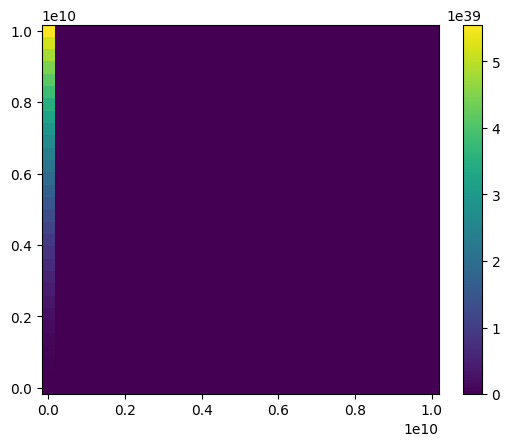

In [10]:
# th2 vs. th3
# plt.contour(*my_meshgrid, cost_surface[0, :, :, 0], cmap="grey")
p = plt.pcolormesh(*my_meshgrid, cost_surface[0, :, :, 0])
plt.colorbar(p)

# th3 makes th2 practically unidentifiable as discussed above.

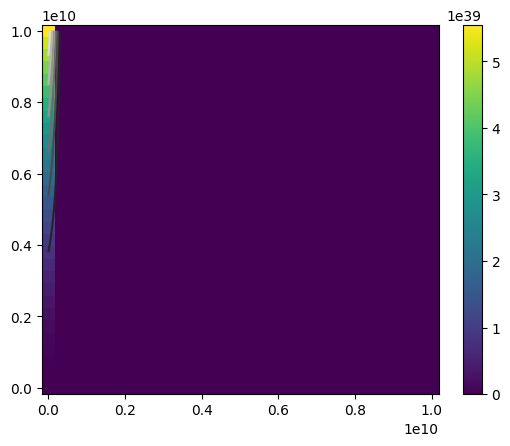

In [11]:
# th2 vs. th4
plt.contour(*my_meshgrid, cost_surface[0, :, 0, :], cmap="grey")
p = plt.pcolormesh(*my_meshgrid, cost_surface[0, :, 0, :])
plt.colorbar(p)

# th4 makes th2 practically unidentifiable as discussed with th1 vs. th4:
# this is because th4 is not actually unidentifiable, but is tied to th3,
# which has polynomial effect on the function.


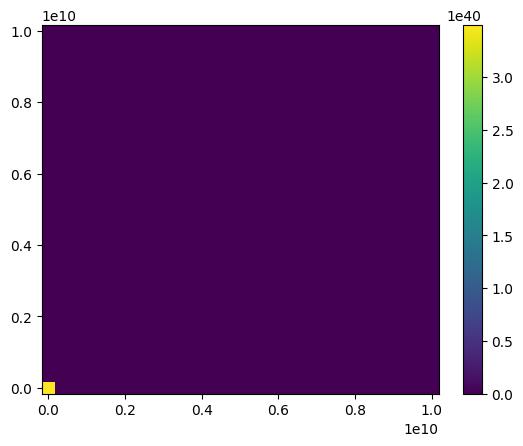

In [12]:
# th3 vs. th4
# plt.contour(*my_meshgrid, cost_surface[15, 0, :, :], cmap="grey")
p = plt.pcolormesh(*my_meshgrid, cost_surface[29, 29, :, :])
plt.colorbar(p)

# th3/th4 is unidentifiable, corresponding to this uninteresting,
# virtually constant 0 loss surface

## Note

I did not use the one page of notes allowed for RYL's